In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [3]:
#Read 10% the original file which contains 42000 rows

import pandas as pd
df = pd.read_csv('train.csv',nrows=4200)


In [4]:
df.shape

(4200, 785)

In [6]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2) 

#No Missing Values

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: floa

In [9]:
order = list(np.sort(df['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


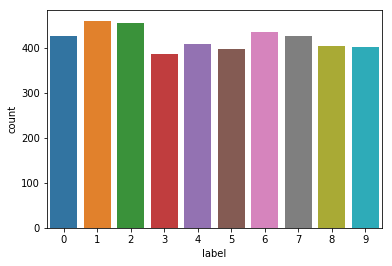

In [27]:
#Check if the data is biased towards one digit

sns.countplot(df['label'])
plt.show()
# looks kinda okay


In [11]:
#Separate Label and Pixel columns. Label is the first column
X_tr = df.iloc[:,1:] # iloc ensures X_tr will be a dataframe
y_tr = df.iloc[:, 0]


In [12]:
#Divide the data into training and test data.stratify=y to preserve distribution of labels

X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=30, stratify=y_tr)


In [ ]:
## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [13]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [14]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9142857142857143 

[[83  0  0  0  0  1  0  1  0  0]
 [ 0 90  0  0  0  1  0  0  1  0]
 [ 1  0 87  0  0  0  2  0  1  0]
 [ 1  2  4 66  0  3  0  1  0  0]
 [ 1  0  1  0 75  0  0  0  0  5]
 [ 0  1  4  2  1 70  2  0  0  0]
 [ 0  0  0  0  1  1 85  0  0  0]
 [ 0  1  3  0  0  0  0 81  0  0]
 [ 1  2  3  4  0  4  0  1 63  3]
 [ 3  0  0  1  2  2  0  4  0 68]]


In [ ]:
The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [15]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [16]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.10952380952380952 

[[ 0 85  0  0  0  0  0  0  0  0]
 [ 0 92  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0]
 [ 0 87  0  0  0  0  0  0  0  0]
 [ 0 85  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0]]


In [32]:
#Use standardscaler to standardize features, using Polynomial Kernel.
#set up the Pipeline object with StandardScaler and SVC as a transformer and estimator respectively

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object


In [33]:
#use the GridSearchCV method with 5 folds cross-validation

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)


In [39]:
#test the model and find the best-fit parameters

grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)
print(score)
print("best parameters from train data: ", grid.best_params_)
 


0.9321428571428572
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [41]:
#best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}

y_pred = grid.predict(X_test)


In [43]:
#We can check some of the predictions

print(y_pred[100:105])
print(y_test[100:105])

#except for one - others are predicted correctly

[8 1 0 8 2]
2580    8
1475    1
4002    0
2328    2
2226    2
Name: label, dtype: int64


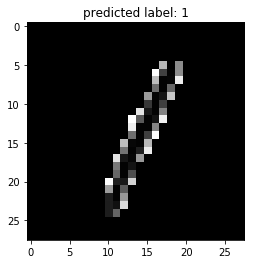

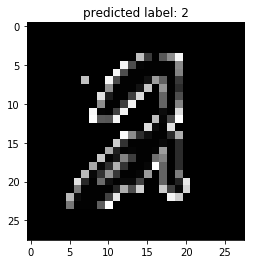

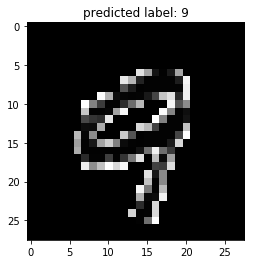

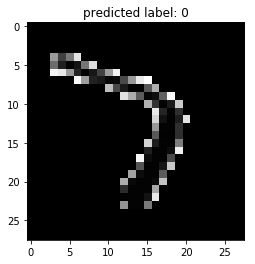

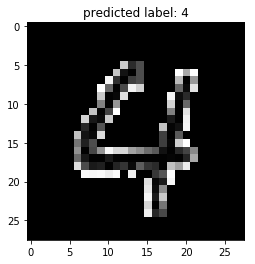

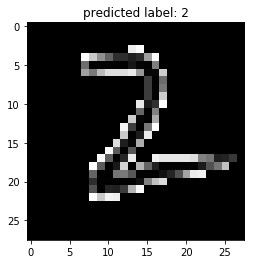

In [44]:
#Try plotting the numbers

for i in (np.random.randint(0,270,6)):
 two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()


In [56]:
#Create Confusion matrix

cm = confusion_matrix(y_test, y_pred)

print("confusion matrix: \n ", cm)


confusion matrix: 
  [[84  0  0  0  0  0  0  0  0  1]
 [ 0 89  0  1  1  0  0  0  1  0]
 [ 0  0 85  1  0  0  0  0  5  0]
 [ 1  0  5 65  0  1  0  0  4  1]
 [ 0  0  1  0 79  0  0  0  0  2]
 [ 0  0  1  2  0 71  4  0  1  1]
 [ 0  0  1  0  1  0 84  0  1  0]
 [ 1  2  0  0  1  0  0 78  1  2]
 [ 0  0  0  3  0  3  0  0 73  2]
 [ 1  0  0  0  0  1  0  3  0 75]]


In [57]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 


In [58]:
#Calculate Accuracy

accuracy(cm)


0.9321428571428572

In [ ]:
there is 93.21% Accuracy with 10 % of Input Data. and I expect this score to increase a bit with the complete 42,000 samples